**Please fo through Regression Case study 1 and 2 Prior before starting with this code.**

**It contains data cleaning, Data visualization, Data preprocessing and Analysis which forms the base for understanding the base of this code**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
sns.set(rc = {'figure.figsize':(11.7,8.27)})

In [4]:
cars_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CarsSampled/cars_sampled.csv")
cars = cars_data.copy()

In [5]:
pd.set_option('display.float_format', lambda x: '%.3f' %x)
pd.set_option('display.max_columns', 500)
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


**Removing Insignificant columns**

In [6]:
col = ['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars = cars.drop(columns = col, axis= 1)

cars.drop_duplicates(keep = 'first', inplace = True)
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49531 entries, 0 to 50000
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   seller               49531 non-null  object
 1   offerType            49531 non-null  object
 2   price                49531 non-null  int64 
 3   abtest               49531 non-null  object
 4   vehicleType          44379 non-null  object
 5   yearOfRegistration   49531 non-null  int64 
 6   gearbox              46766 non-null  object
 7   powerPS              49531 non-null  int64 
 8   model                46801 non-null  object
 9   kilometer            49531 non-null  int64 
 10  monthOfRegistration  49531 non-null  int64 
 11  fuelType             45064 non-null  object
 12  brand                49531 non-null  object
 13  notRepairedDamage    39891 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.7+ MB


**Subsetting only the significant Data**

In [7]:
cars = cars[
    (cars["yearOfRegistration"] <= 2020)
    &(cars["yearOfRegistration"] >= 1950)
    &(cars["price"] >= 100)
    &(cars["price"] <= 150000)
    &(cars["powerPS"] >= 10)
    &(cars["powerPS"] <= 500)
]
# Approx 6700 records are dropped

In [8]:
cars['Age'] = (2020 - cars['yearOfRegistration']) + ((cars['monthOfRegistration'])/12)
cars["Age"] = round(cars["Age"], 2)
cars['Age'].describe()

count   42772.000
mean       16.873
std         7.093
min         2.000
25%        12.330
50%        16.830
75%        21.170
max        69.750
Name: Age, dtype: float64

*Further Dropping insignificant variables*

In [9]:
cars = cars.drop(columns = ['yearOfRegistration','monthOfRegistration'])

In [10]:
## Correlation Among Numeric Variables

cars_select1 = cars.select_dtypes(exclude = [object])
correlation = cars_select1.corr()
print(round(correlation,3))
print(cars_select1.corr().loc[:,'price'].abs().sort_values(ascending  = False))

           price  powerPS  kilometer    Age
price      1.000    0.575     -0.440 -0.336
powerPS    0.575    1.000     -0.016 -0.151
kilometer -0.440   -0.016      1.000  0.292
Age       -0.336   -0.151      0.292  1.000
price       1.000
powerPS     0.575
kilometer   0.440
Age         0.336
Name: price, dtype: float64


## Actual code of this Session
We are going to build a linear regression and random forest regression model on 2 sets of data
1. Data obtained by omitting rows with any missing value
2. Data obtained by imputing the misssing values

## ==== 1. Linear Regression Model Omitting the missing values ====

In [11]:
cars_omit = cars.dropna(axis = 0)
# Approx 10000 records removed

In [12]:
cars_omit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32884 entries, 1 to 50000
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seller             32884 non-null  object 
 1   offerType          32884 non-null  object 
 2   price              32884 non-null  int64  
 3   abtest             32884 non-null  object 
 4   vehicleType        32884 non-null  object 
 5   gearbox            32884 non-null  object 
 6   powerPS            32884 non-null  int64  
 7   model              32884 non-null  object 
 8   kilometer          32884 non-null  int64  
 9   fuelType           32884 non-null  object 
 10  brand              32884 non-null  object 
 11  notRepairedDamage  32884 non-null  object 
 12  Age                32884 non-null  float64
dtypes: float64(1), int64(3), object(9)
memory usage: 3.5+ MB


In [13]:
cars_omit.head(5)

,seller,offerType,price,abtest,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,Age
1,private,offer,13299,control,suv,manual,163,xc_reihe,150000,diesel,volvo,no,15.500
3,private,offer,4500,control,small car,manual,86,ibiza,60000,petrol,seat,no,15.000
4,private,offer,18750,test,suv,automatic,185,xc_reihe,150000,diesel,volvo,no,12.920
5,private,offer,988,test,limousine,manual,90,passat,150000,petrol,volkswagen,no,25.170
7,private,offer,1399,test,coupe,manual,136,clk,150000,petrol,mercedes_benz,no,23.920


In [14]:
cars_omit2 = cars_omit.copy()

In [15]:
cars_omit.to_csv("cars_cleaned.csv", index = False)

In [16]:
encoder = LabelEncoder()

#### converting categorical variables into dummy variables

In [17]:
# print(cars_omit['seller'].unique())
# print("\n")
# print(cars_omit['offerType'].unique())
# print("\n")
# print(cars_omit['vehicleType'].unique())
# print("\n")
# print(cars_omit['gearbox'].unique())
# print("\n")
# print(cars_omit['model'].unique())
# print("\n")
# print(cars_omit['fuelType'].unique())
# print("\n")
# print(cars_omit['brand'].unique())
# print("\n")
# print(cars_omit['notRepairedDamage'].unique())

In [18]:
seller_encoder = LabelEncoder()
cars_omit['seller'] = seller_encoder.fit_transform(cars_omit['seller'])

offerType_encoder = LabelEncoder()
cars_omit['offerType'] = offerType_encoder.fit_transform(cars_omit['offerType'])

abtest_encoder = LabelEncoder()
cars_omit['abtest'] = abtest_encoder.fit_transform(cars_omit['abtest'])

vehicleType_encoder = LabelEncoder()
cars_omit['vehicleType'] = vehicleType_encoder.fit_transform(cars_omit['vehicleType'])

gearbox_encoder = LabelEncoder()
cars_omit['gearbox'] = gearbox_encoder.fit_transform(cars_omit['gearbox'])

model_encoder = LabelEncoder()
cars_omit['model'] = model_encoder.fit_transform(cars_omit['model'])

fuelType_encoder = LabelEncoder()
cars_omit['fuelType'] = fuelType_encoder.fit_transform(cars_omit['fuelType'])

brand_encoder = LabelEncoder()
cars_omit['brand'] = brand_encoder.fit_transform(cars_omit['brand'])

notRepairedDamage_encoder = LabelEncoder()
cars_omit['notRepairedDamage'] = notRepairedDamage_encoder.fit_transform(cars_omit['notRepairedDamage'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [19]:
seller_dict = {name: seller_encoder.transform([name])  for name in cars_omit2['seller'].unique()}

offerType_dict = {name: offerType_encoder.transform([name])  for name in cars_omit2['offerType'].unique()}

vehicleType_dict = {name: vehicleType_encoder.transform([name])  for name in cars_omit2['vehicleType'].unique()}

abtest_dict = {name: abtest_encoder.transform([name])  for name in cars_omit2['abtest'].unique()}

gearbox_dict = {name: gearbox_encoder.transform([name])  for name in cars_omit2['gearbox'].unique()}

model_dict = {name: model_encoder.transform([name])  for name in cars_omit2['model'].unique()}

fuelType_dict = {name: fuelType_encoder.transform([name])  for name in cars_omit2['fuelType'].unique()}

brand_dict = {name: brand_encoder.transform([name])  for name in cars_omit2['brand'].unique()}

notRepairedDamage_dict = {name: notRepairedDamage_encoder.transform([name])  for name in cars_omit2['notRepairedDamage'].unique()}

In [20]:
print("seller_dict: \n", seller_dict,"\n")
print("offerType_dict: \n", offerType_dict,"\n")
print("vehicleType_dict: \n", vehicleType_dict,"\n")
print("abtest_dict: \n", abtest_dict,"\n")
print("gearbox_dict: \n", gearbox_dict,"\n")
print("fuelType_dict: \n", fuelType_dict,"\n")
print("brand_dict: \n", brand_dict,"\n")
print("notRepairedDamage_dict: \n", notRepairedDamage_dict,"\n")

seller_dict: 
 {'private': array([1]), 'commercial': array([0])} 

offerType_dict: 
 {'offer': array([0])} 

vehicleType_dict: 
 {'suv': array([7]), 'small car': array([5]), 'limousine': array([3]), 'coupe': array([2]), 'station wagon': array([6]), 'cabrio': array([1]), 'bus': array([0]), 'others': array([4])} 

abtest_dict: 
 {'control': array([0]), 'test': array([1])} 

gearbox_dict: 
 {'manual': array([1]), 'automatic': array([0])} 

fuelType_dict: 
 {'diesel': array([1]), 'petrol': array([6]), 'cng': array([0]), 'lpg': array([4]), 'hybrid': array([3]), 'electro': array([2]), 'other': array([5])} 

brand_dict: 
 {'volvo': array([38]), 'seat': array([30]), 'volkswagen': array([37]), 'mercedes_benz': array([20]), 'opel': array([24]), 'skoda': array([31]), 'toyota': array([35]), 'nissan': array([23]), 'mazda': array([19]), 'mitsubishi': array([22]), 'audi': array([1]), 'fiat': array([9]), 'alfa_romeo': array([0]), 'saab': array([29]), 'bmw': array([2]), 'peugeot': array([25]), 'land_ro

In [21]:
# brand_dict['volvo']

array([38])

In [22]:
# cars_omit = pd.get_dummies(cars_omit, drop_first = True)

In [53]:
cars_omit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32884 entries, 1 to 50000
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seller             32884 non-null  int64  
 1   offerType          32884 non-null  int64  
 2   price              32884 non-null  int64  
 3   abtest             32884 non-null  int64  
 4   vehicleType        32884 non-null  int64  
 5   gearbox            32884 non-null  int64  
 6   powerPS            32884 non-null  int64  
 7   model              32884 non-null  int64  
 8   kilometer          32884 non-null  int64  
 9   fuelType           32884 non-null  int64  
 10  brand              32884 non-null  int64  
 11  notRepairedDamage  32884 non-null  int64  
 12  Age                32884 non-null  float64
dtypes: float64(1), int64(12)
memory usage: 4.5 MB


### ===== Building model with the omitted data =====
#### separating input and output variables

In [54]:
x1 = cars_omit.drop(['price'], axis= 1, inplace = False)
y1 = cars_omit['price']

#### plotting the variable price

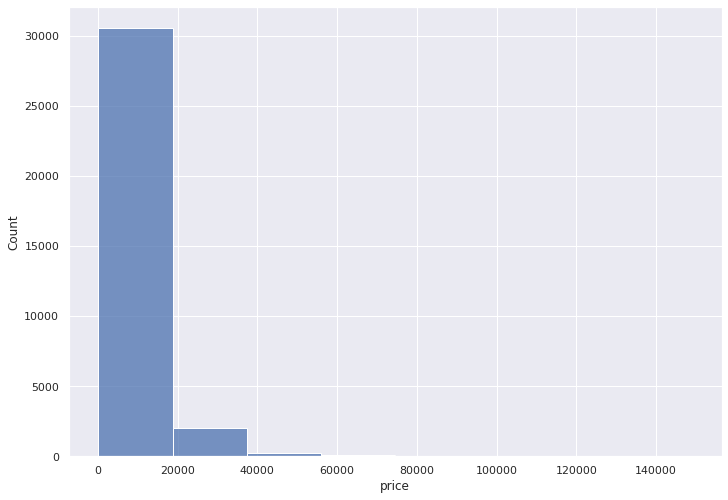

In [55]:
sns.histplot(x = y1, bins = 8)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb661184cd0>,
      dtype=object)

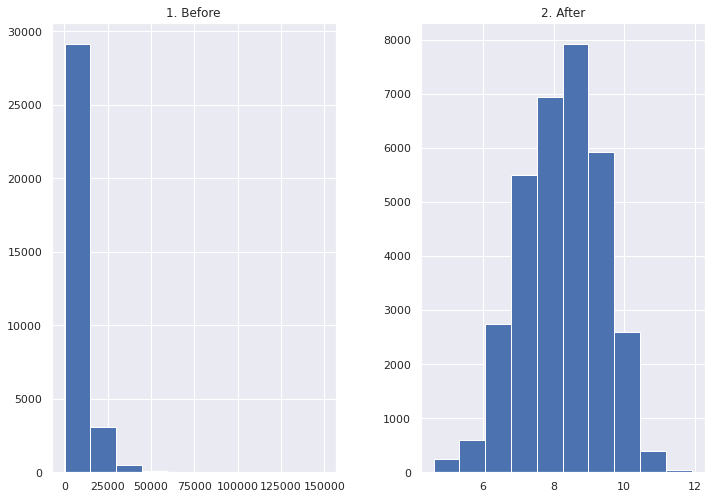

In [56]:
prices = pd.DataFrame({"1. Before": y1, "2. After": np.log(y1)})
prices.hist()



1. for histogram for log(prices)... it is nicely bell shaped
2. for histogram for simply prices... it is a skewed graph

so it is better to go further with natural log of prices and not just with price

So, we will be regressing the natural logarithm of prices with the input features

#### Transforming price as a Logarthmic value

In [57]:
y1 = np.log(y1)

#### Splitting the data into test and train

In [58]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(x1, y1, test_size = 0.15, random_state = 28)
print(X_train1.shape, X_test1.shape, Y_train1.shape, Y_test1.shape)

(27951, 12) (4933, 12) (27951,) (4933,)


In [59]:
Y_test1.describe()

count   4933.000
mean       8.221
std        1.143
min        4.605
25%        7.432
50%        8.269
75%        9.081
max       11.912
Name: price, dtype: float64

In [60]:
Y_train1.describe()

count   27951.000
mean        8.245
std         1.132
min         4.605
25%         7.432
50%         8.294
75%         9.083
max        11.842
Name: price, dtype: float64

### Baseline Model for the Omitted Data
In baseline model the predicted value is replaced by the mean value of the test data

We are making a base model by using test data mean value

This is to set a benchmark and to compare with our regression model

inshort... setting the base value (base metric)

#### finding mean for test data value

In [61]:
base_pred_1 = np.mean(Y_test1)
print(base_pred_1)

8.221355166428635


#### Repeating the same value till the length of test data

In [62]:
base_pred_1 = np.repeat(base_pred_1, len(Y_test1))

#### Finding RMSE (Root Mean Square Error)
1. it computes the difference between test value and predicted value .... squares them... and divides by the no. of observations
2. this is the mean squared error
3. when you take the squareroot of mean squared error... you get RMSE value

In [63]:
# np.exp(mean_absolute_error(Y_test1, base_pred_1))

In [64]:
# np.exp(mean_squared_error(Y_test1, base_pred_1))


In [65]:
base_root_mean_square_error_1 = np.sqrt(mean_squared_error(Y_test1, base_pred_1))
print(base_root_mean_square_error_1)

1.1426280312331127


In [66]:
# print(np.exp(base_root_mean_square_error_1))

## Linear Regression with Omitted Data

In [67]:
lnr = LinearRegression(fit_intercept = True)

#### model

In [68]:
model_lin1 = lnr.fit(X_train1, Y_train1)

In [69]:
r2_lin_train1 = model_lin1.score(X_train1, Y_train1)
r2_lin_test1 = model_lin1.score(X_test1, Y_test1)
print(f"Linear Regression Accuracy Score for training set (Omitting missing values): {r2_lin_train1}\n\
Linear Regression Accuracy Score for testing set (Omitting missing values): {r2_lin_test1}")

Linear Regression Accuracy Score for training set (Omitting missing values): 0.7038306479219663
Linear Regression Accuracy Score for testing set (Omitting missing values): 0.6996569806655992


#### Predicting model on test set

In [70]:
cars_predictions_lin1 = lnr.predict(X_test1)

#### calculating MSE and RMSE for predictions


In [71]:
lin_mse1 = mean_squared_error(Y_test1, cars_predictions_lin1)
lin_rmse1 = np.sqrt(lin_mse1)
print(lin_rmse1)

0.6262008391605365



it should be noted that the RMSE valus has dropped from 1.14 to 0.62 (Approx 45% reduction)

R squared value
it helps to tell you how good is your model able to explain the variability in 'Y'

In [72]:
r2_lin_train1 = model_lin1.score(X_train1, Y_train1)
r2_lin_test1 = model_lin1.score(X_test1, Y_test1)
print(f"r2_lin1_train1: {r2_lin_train1}\nr2_lin1_test1: {r2_lin_test1}")

r2_lin1_train1: 0.7038306479219663
r2_lin1_test1: 0.6996569806655992


R sq. value for train set is 0.7038 and R sq. value for test set is 0.6996

train set is definitely better... but the test set is not far behind



As much as variability the model was able to capture in the train data...it is able to capture the same amount of variability (if not more) in the test data as well.

## Random Forest regressor using omitted data
### Parameters


#### n_estimators: 'int' (def 100)
Number of trees in the forest
#### min_samples_split: 'int' or 'float' (def 2)
Minimum No. of samples required to split an internal node
#### min_samples_leaf: int or float (def 1)
Minimum No. of samples required to be at a leaf node. A split point will be considered only if it leaves at least (Min_samples_leaf) training samples in each of left and right branches

#### max_features: {'auto', 'sqrt', 'log'}, int, float  (def 'auto')
No. of features to be considered to build the model
1. if 'auto', then max_features = n_features (chooses the features automatically)
2. if 'sqrt', then max_features = sqrt(n_features)
3. if 'log', then max_features = log(n_features)
4. if int, then consider (int) features at each split

#### max_depth: int (def None)
The maximum depth of the tree. If None, nodes are expanded untill all leaves are pure or until all leaves contain less than min_samples_split

#### criterion: {'mse', 'mae'} (def: 'mse')
#### random_state: int
it is a predefined algorithm for randomizer.... if not specified, it will take different data sets everytime

In [73]:
rf = RandomForestRegressor(n_estimators = 100,
                          max_features = 'auto',
                          max_depth = 100,
                          min_samples_split = 10,
                          min_samples_leaf = 4,
                          random_state = 10)

#### model

In [74]:
model_rf1 = rf.fit(X_train1, Y_train1)

In [75]:
r2_rf_train1 = model_rf1.score(X_train1, Y_train1)
r2_rf_test1 = model_rf1.score(X_test1, Y_test1)
print(f"Random Forest Accuracy Score for training set (Omitting missing values): {r2_rf_train1}\n\
Random Forest Accuracy Score for testing set (Omitting missing values): {r2_rf_test1}")

Random Forest Accuracy Score for training set (Omitting missing values): 0.9228205017772251
Random Forest Accuracy Score for testing set (Omitting missing values): 0.8655026936102348


#### Predicting model on test set

In [76]:
cars_predictions_rf1 = rf.predict(X_test1)

#### Computing MSE and RMSE values

In [77]:
rf_mse1 = mean_squared_error(Y_test1, cars_predictions_rf1)
rf_rmse1 = np.sqrt(rf_mse1)
print(rf_rmse1)

0.419045969094485


Thus, it should be noted that Random Forest model is performing better than the Linear regression model as the RMSE model has come down further

#### R squared value

In [78]:
r2_rf_train1 = model_rf1.score(X_train1, Y_train1)
r2_rf_test1 = model_rf1.score(X_test1, Y_test1)
print(f"r2_rf_train1: {r2_rf_train1}\nr2_lin1_test1: {r2_rf_test1}")

r2_rf_train1: 0.9228205017772251
r2_lin1_test1: 0.8655026936102348


# FINAL OUTPUT

In [79]:
# FOR OMITTED DATA
print(f"Metrics for models built from data where missing values were omitted")
print(f"Base RMSE value = {base_root_mean_square_error_1}")
print(f"RMSE value for linear Regression model = {lin_rmse1}")
print(f"RMSE value for Random Forest model = {rf_rmse1}")
print(f"Accuracy Score for training set from linear regression = {r2_lin_train1}")
print(f"Accuracy Score for testing set from linear regression = {r2_lin_test1}")
print(f"Accuracy Score for training set from random forest regressor = {r2_rf_train1}")
print(f"Accuracy Score for testing set from random forest regressor = {r2_rf_test1}")

Metrics for models built from data where missing values were omitted
Base RMSE value = 1.1426280312331127
RMSE value for linear Regression model = 0.6262008391605365
RMSE value for Random Forest model = 0.419045969094485
Accuracy Score for training set from linear regression = 0.7038306479219663
Accuracy Score for testing set from linear regression = 0.6996569806655992
Accuracy Score for training set from random forest regressor = 0.9228205017772251
Accuracy Score for testing set from random forest regressor = 0.8655026936102348


In [80]:
# import pickle
# with open('RFR_model_by_omitting_NA_Values.pkl', 'wb') as f:
#     pickle.dump(rf , f)
# with open('Lin_reg_model_by_omitting_NA_Values.pkl', 'wb') as f:
#     pickle.dump(lnr , f)

**Note that the below functions are written just for the sake of making predictions with a random record**

**They are not robust and do not show errors when any value out of range is specified**

**The robustness part is left pending for the time being and can be completed later**

In [81]:
def seller():
    seller = str(input("Enter the Seller Type (default: 'Private'). Type 'C' for commercial: ")).upper()
    if seller == 'P':
        seller = 'private'
    elif seller == 'C':
        seller = 'commercial'
    else:
        seller = 'private'
    return seller
    
# print(seller())

In [82]:
offerType = 'offer'

In [83]:
def abtest():
    abtest = str(input("Enter the Abs test status (default: 'Test'). Type 'C' for Control: ")).upper()
    if abtest == 'T':
        abtest = 'test'
    elif abtest == 'C':
        abtest = 'control'
    else:
        abtest = 'test'
    return abtest

# print(abtest())

In [84]:
def vehicleType():
    vType = str(input("Enter Vehicle type: bus/cabrio/coupe/limousine/small car/station wagon/suv/others : ")).lower()
    if vType in ['bus','cabrio','coupe','limousine','small car','station wagon','suv','others']:
        return vType
    else:
        return vehicleType()
        

# print(vehicleType())

In [85]:
def gearbox():
    gearbox = str(input("Enter the gearbox type (default: 'Manual'). Type 'A' for Automatic: ")).upper()
    if gearbox == 'A':
        gearbox = 'automatic'
    elif gearbox == 'M':
        gearbox = 'manual'
    else:
        gearbox = 'manual'
    return gearbox
    
# print(gearbox())

In [86]:
def powerPS():
    powerPS = int(input("enter the HorsePower (range 0 to 300): "))
#     if type(powerPS) == int:
#         if 0<powerPS<300:
#             pass
#         else:
#             powerPS()
#     else:
#         powerPS()
    return powerPS

# print(powerPS())

## Need to look for exception handling

In [87]:
def age():
    reg = int(input('Enter Year of registration: '))
    age = 0
    if type(reg) == int:
        age = 2022 - reg
        return age
    else:
        print("invalid input")
        age()

# print(age())

## Need to look for exception handling for strings

In [88]:
def km():
    km = float(input("Enter the km travelled: "))
    return km

## Need to look for exception handling for negative nos and strings

# print(km())

In [89]:
def damage():
    damage = input("Have the previous damages been repaired? (default: NO). Type 'Y' for yes: ").upper()
    if damage == 'Y':
        damage = 'no'
    elif damage == 'N':
        damage = 'yes'
    else:
        damage = 'yes'
    
    return damage

# print(damage())

In [90]:
def brand():
    br = input("Enter brand name from ['volvo', 'seat', 'volkswagen', 'mercedes_benz', 'opel', 'skoda', 'toyota','nissan',\
    'mazda', 'mitsubishi', 'audi', 'fiat', 'alfa_romeo', 'saab', 'bmw', 'peugeot', 'land_rover', 'subaru',\
    'citroen', 'jeep', 'chrysler', 'ford', 'renault', 'dacia', 'chevrolet', 'smart', 'mini', 'trabant', 'suzuki',\
    'hyundai', 'honda', 'jaguar', 'porsche', 'kia', 'daihatsu', 'lancia', 'daewoo', 'rover', 'lada']: ").lower()
    
    if br in ['volvo', 'seat', 'volkswagen', 'mercedes_benz', 'opel', 'skoda', 'toyota','nissan',\
                  'mazda', 'mitsubishi', 'audi', 'fiat', 'alfa_romeo', 'saab', 'bmw', 'peugeot', 'land_rover', 'subaru',\
                  'citroen', 'jeep', 'chrysler', 'ford', 'renault', 'dacia', 'chevrolet', 'smart', 'mini', 'trabant', 'suzuki',\
                  'hyundai', 'honda', 'jaguar', 'porsche', 'kia', 'daihatsu', 'lancia', 'daewoo', 'rover', 'lada']:
        return br
    else:
        print('invalid input')
        return brand()

# print("\n",brand())

In [ ]:
#  brand_encoder.transform([brand()])

In [91]:
def fueltype():
    fuelT = input("Enter the car  fuel Type from ['diesel', 'petrol', 'cng', 'lpg', 'hybrid', 'electro', 'other']: ").lower()
    
    if fuelT in ['diesel', 'petrol', 'cng', 'lpg', 'hybrid', 'electro', 'other']:
        return fuelT
    else:
        print('invalid input')
        return fueltype()

# print(fueltype())

In [92]:
def model():
    mod = input("enter model name: ")
    if mod in ['xc_reihe', 'ibiza', 'passat', 'clk', 'vectra', 'octavia', 'a_klasse', 'astra',\
               'yaris', 'meriva', 'others', 'golf', '3_reihe', 'colt', '80', 'panda', 'micra',\
               '156', 'c_klasse', '1er', '3er', 'freelander', 'a4', 'e_klasse', 'forester',\
               '5er', 'grand', 'voyager', 'polo', 'fiesta', 'clio', 'a3', 'slk', 'x_reihe',\
               'fabia', 'logan', '500', 'punto', 'berlingo', 's_klasse', '2_reihe', 'galaxy',\
               'agila', 'touran', 'captiva' ,'scenic', 'mondeo', 'omega', 'a6', 'fortwo',\
               'scirocco', 'transporter', 'c4', 'qashqai', 'ka', 'clubman', 'sharan',\
               'insignia', '7er', 'megane', 'corsa', 'arosa', 'z_reihe', 'caddy', 'aygo',\
               'matiz', 'focus', 'sl', 'combo', 'corolla', '601', 'c_reihe', 'beetle', 'tigra',\
               'twingo', 'tiguan', 'cooper', 's_max', 'toledo', 'carisma', 'zafira', 'a2',\
               'primera', 'a5' ,'tt', 'citigo' ,'tucson', 'accord', 'rav', 'i_reihe', 'laguna',\
               'roadster', 'bora', 'kuga', '147', 'c1', 'civic', 'mustang', 'lupo', 'c5',\
               'mx_reihe' ,'cayenne', 'justy' ,'santa' ,'transit', 'up', 'yeti', 'modus',\
               'rx_reihe' ,'sprinter', 'forfour' ,'cherokee', 'cordoba' ,'v40' ,'navara', 'v70',\
               'q3' ,'sorento', 'verso', 'kaefer', 'v_klasse', 'doblo' ,'1_reihe', 'fox',\
               '6_reihe', 'altea', 'almera', 'leon', 'boxster' ,'calibra' ,'q5', '911',\
               'x_trail', 'v50', 'impreza', 'swift', 'm_klasse', 'jetta' ,'escort' ,'eos', '100',\
               'sandero', '4_reihe', '300c', 'bravo' ,'stilo', 'a1', 'cl', 'kangoo', 'one',\
               'pajero', 'ducato', 'vivaro', 'touareg', 'cr_reihe', '850' ,'q7' ,'duster',\
               'kadett', 'cx_reihe' ,'ceed', 'rio','seicento', 'b_klasse', 'musa' ,'cc',\
               'c_max', 'getz', 'c2', '5_reihe', '900', 'kalos', 'ypsilon', 'jazz', 'ptcruiser',\
               'sportage', 'vito', 'c3', 'signum' ,'aveo', 'jimny', 'note' ,'avensis', 'm_reihe',\
               'auris' ,'espace', 'picanto', 'juke', 'lancer', '6er', 'phaeton', 'x_type',\
               'range_rover_sport', 'spark', 'viano', 'superb', '159', 'alhambra', 'fusion',\
               'a8' ,'legacy', 'amarok' ,'galant', 's60' ,'glk', 'wrangler' ,'9000' ,'roomster',\
               'carnival', 'i3', 'exeo', 'outlander', 'b_max', 'antara', '90', 'niva', 'r19',\
               'sirion', 'nubira', 'g_klasse' ,'spider', 'mii' ,'cuore', 'lodgy', 'crossfire',\
               'range_rover_evoque', 'terios' ,'serie_2', 'lanos', 'range_rover', '200',\
               's_type', 'materia' ,'defender', 'lybra', 'croma', 'discovery', 'v60', 'serie_3',\
               'move' ,'delta', 'gl', 'kalina', 'charade', 'rangerover']:
        return mod
    else:
        print("Oops!!! sorry, the specified model does not exist in the database. Please specify another model.")
        return model()
    
# print(model())

In [ ]:
# model_rf1.predict([[
#     seller_encoder.transform(['private']),
#     offerType_encoder.transform(['offer']),
#     abtest_encoder.transform(['test']),
#     vehicleType_encoder.transform(['cabrio']),
#     gearbox_encoder.transform(['manual']),
#     130,
#     model_encoder.transform(['80']),
#     150000,
#     fuelType_encoder.transform(['petrol']),
#     brand_encoder.transform(['audi']),
#     notRepairedDamage_encoder.transform(['no']),
#     2
# ]])

In [ ]:
# np.exp(model_rf1.predict([[
#     seller_encoder.transform(['private']),   ## seller_encoder.transform([seller()])
#     offerType_encoder.transform(['offer']),  ## let it be same
#     abtest_encoder.transform(['test']),      ## abtest_encoder.transform([abtest()])
#     vehicleType_encoder.transform(['limousine']),## recursive function ??...made, check once
#     gearbox_encoder.transform(['manual']),    ## gearbox_encoder.transform([gearbox()])
#     140,                                      ## powerPS()
#     model_encoder.transform(['passat']),      ## model_encoder.transform([model()])
#     150000,                                   ## km()
#     fuelType_encoder.transform(['diesel']),   ## fuelType_encoder.transform([fueltype()])
#     brand_encoder.transform(['volkswagen']),       ## brand_encoder.transform([brand()])
#     notRepairedDamage_encoder.transform(['no']),## notRepairedDamage_encoder.transform([damage()])
#     15                                     ## age()
# ]]))

Selecting any random record 

In [93]:
cars.loc[38703]

seller                     private
offerType                    offer
price                        20800
abtest                     control
vehicleType                    bus
gearbox                  automatic
powerPS                        156
model                     b_klasse
kilometer                    20000
fuelType                    petrol
brand                mercedes_benz
notRepairedDamage               no
Age                          8.670
Name: 38703, dtype: object

Imputing the above data itself to test the accuracy of the model

In [94]:
pred = np.exp(model_rf1.predict([[
    seller_encoder.transform([seller()]),
    offerType_encoder.transform(['offer']),
    abtest_encoder.transform([abtest()]),
    vehicleType_encoder.transform([vehicleType()]),
    gearbox_encoder.transform([gearbox()]),
    powerPS(),
    model_encoder.transform([model()]),
    km(),
    fuelType_encoder.transform([fueltype()]),
    brand_encoder.transform([brand()]),
    notRepairedDamage_encoder.transform([damage()]),
    age()
]]))

Enter the Seller Type (default: 'Private'). Type 'C' for commercial: 
Enter the Abs test status (default: 'Test'). Type 'C' for Control: c
Enter Vehicle type: bus/cabrio/coupe/limousine/small car/station wagon/suv/others : bus
Enter the gearbox type (default: 'Manual'). Type 'A' for Automatic: a
enter the HorsePower (range 0 to 300): 156
enter model name: b_klasse
Enter the km travelled: 20000
Enter the car  fuel Type from ['diesel', 'petrol', 'cng', 'lpg', 'hybrid', 'electro', 'other']: petrol
Enter brand name from ['volvo', 'seat', 'volkswagen', 'mercedes_benz', 'opel', 'skoda', 'toyota','nissan',    'mazda', 'mitsubishi', 'audi', 'fiat', 'alfa_romeo', 'saab', 'bmw', 'peugeot', 'land_rover', 'subaru',    'citroen', 'jeep', 'chrysler', 'ford', 'renault', 'dacia', 'chevrolet', 'smart', 'mini', 'trabant', 'suzuki',    'hyundai', 'honda', 'jaguar', 'porsche', 'kia', 'daihatsu', 'lancia', 'daewoo', 'rover', 'lada']: mercedes_benz
Have the previous damages been repaired? (default: NO). Typ

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [95]:
print(f"The value of your car is: {pred[0]}")

The value of your car is: 20860.0640113446


**Hurray!!!**

The model is working perferctly fine!!!

In [ ]:
# np.exp(lnr.predict([[
#     seller_encoder.transform([seller()]),
#     offerType_encoder.transform(['offer']),
#     abtest_encoder.transform([abtest()]),
#     vehicleType_encoder.transform([vehicleType()]),
#     gearbox_encoder.transform([gearbox()]),
#     powerPS(),
#     model_encoder.transform([model()]),
#     km(),
#     fuelType_encoder.transform([fueltype()]),
#     brand_encoder.transform([brand()]),
#     notRepairedDamage_encoder.transform([damage()]),
#     age()
# ]]))

## NOTE: For proper real world usecases, we would first need to create a database of all models with their specifications.

## When a new user gives inputs, we first need to verify the specifications whether they are genuine or not before proceeding further with predictions

For example, Electic / Hybrid cars did not exist in 1970's

So, if a user gives fueltype as Hybrid for a car with registration Year in 1970's we need to throw an error saying that the specifications do not match

## However, building the Database and then deploying the model is too large for a project in itself as it would need knowledge of DataBase Management Systems, Integration with html, css and javascript using flask, etc

### So, as of now, just limiting the scope of the project only to building ML Model